In [78]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import skew
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
import shap
from sklearn.pipeline import make_pipeline



import math

In [26]:
data = pd.read_csv("/Users/kithaa1/Desktop/TEMG4940C - Assignment Dataset.csv", sep='\t')
data = data.set_index('ID')
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0


In [27]:
data.T

ID,5524,2174,4141,6182,5324,7446,965,6177,4855,5899,...,7004,9817,8080,9432,8372,10870,4001,7270,8235,9405
Year_Birth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,...,1984,1970,1986,1977,1974,1967,1946,1981,1956,1954
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD,...,Graduation,Master,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,Master,PhD
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together,...,Single,Single,Single,Together,Married,Married,Together,Divorced,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,...,11012.0,44802.0,26816.0,666666.0,34421.0,61223.0,64014.0,56981.0,69245.0,52869.0
Kidhome,0,1,0,1,1,0,0,1,1,1,...,1,0,0,1,1,0,2,0,0,1
Teenhome,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014,09-09-2013,13-11-2012,08-05-2013,06-06-2013,13-03-2014,...,16-03-2013,21-08-2012,17-08-2012,02-06-2013,01-07-2013,13-06-2013,10-06-2014,25-01-2014,24-01-2014,15-10-2012
Recency,58,38,26,26,94,16,34,32,19,68,...,82,71,50,23,81,46,56,91,8,40
MntWines,635,11,426,11,173,520,235,76,14,28,...,24,853,5,9,3,709,406,908,428,84
MntFruits,88,1,49,4,43,42,65,10,0,0,...,3,10,1,14,3,43,0,48,30,3


In [28]:
print("Number of data points:", len(data))

Number of data points: 2240


In [29]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Question 0
***

In [30]:
variables = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
Y = data[variables].sum(axis='columns')
Y.name = 'NumAcceptedCmp'
Y

ID
5524     1
2174     0
4141     0
6182     0
5324     0
        ..
10870    0
4001     1
7270     1
8235     0
9405     1
Name: NumAcceptedCmp, Length: 2240, dtype: int64

## Question 1a
***

In [31]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0


In [32]:
## Missing Values

print("Are there missing values: ", data.isna().any().any())

Are there missing values:  True


In [33]:
##Checking for outliers

numeric_columns = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

numeric_data = data[numeric_columns]
numeric_data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
ID,,,,,,,,,,,,,,,
5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5
4001,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7
7270,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6


**Checking for Outliers**

In [34]:
numeric_data.to_csv("numeric-data.csv")

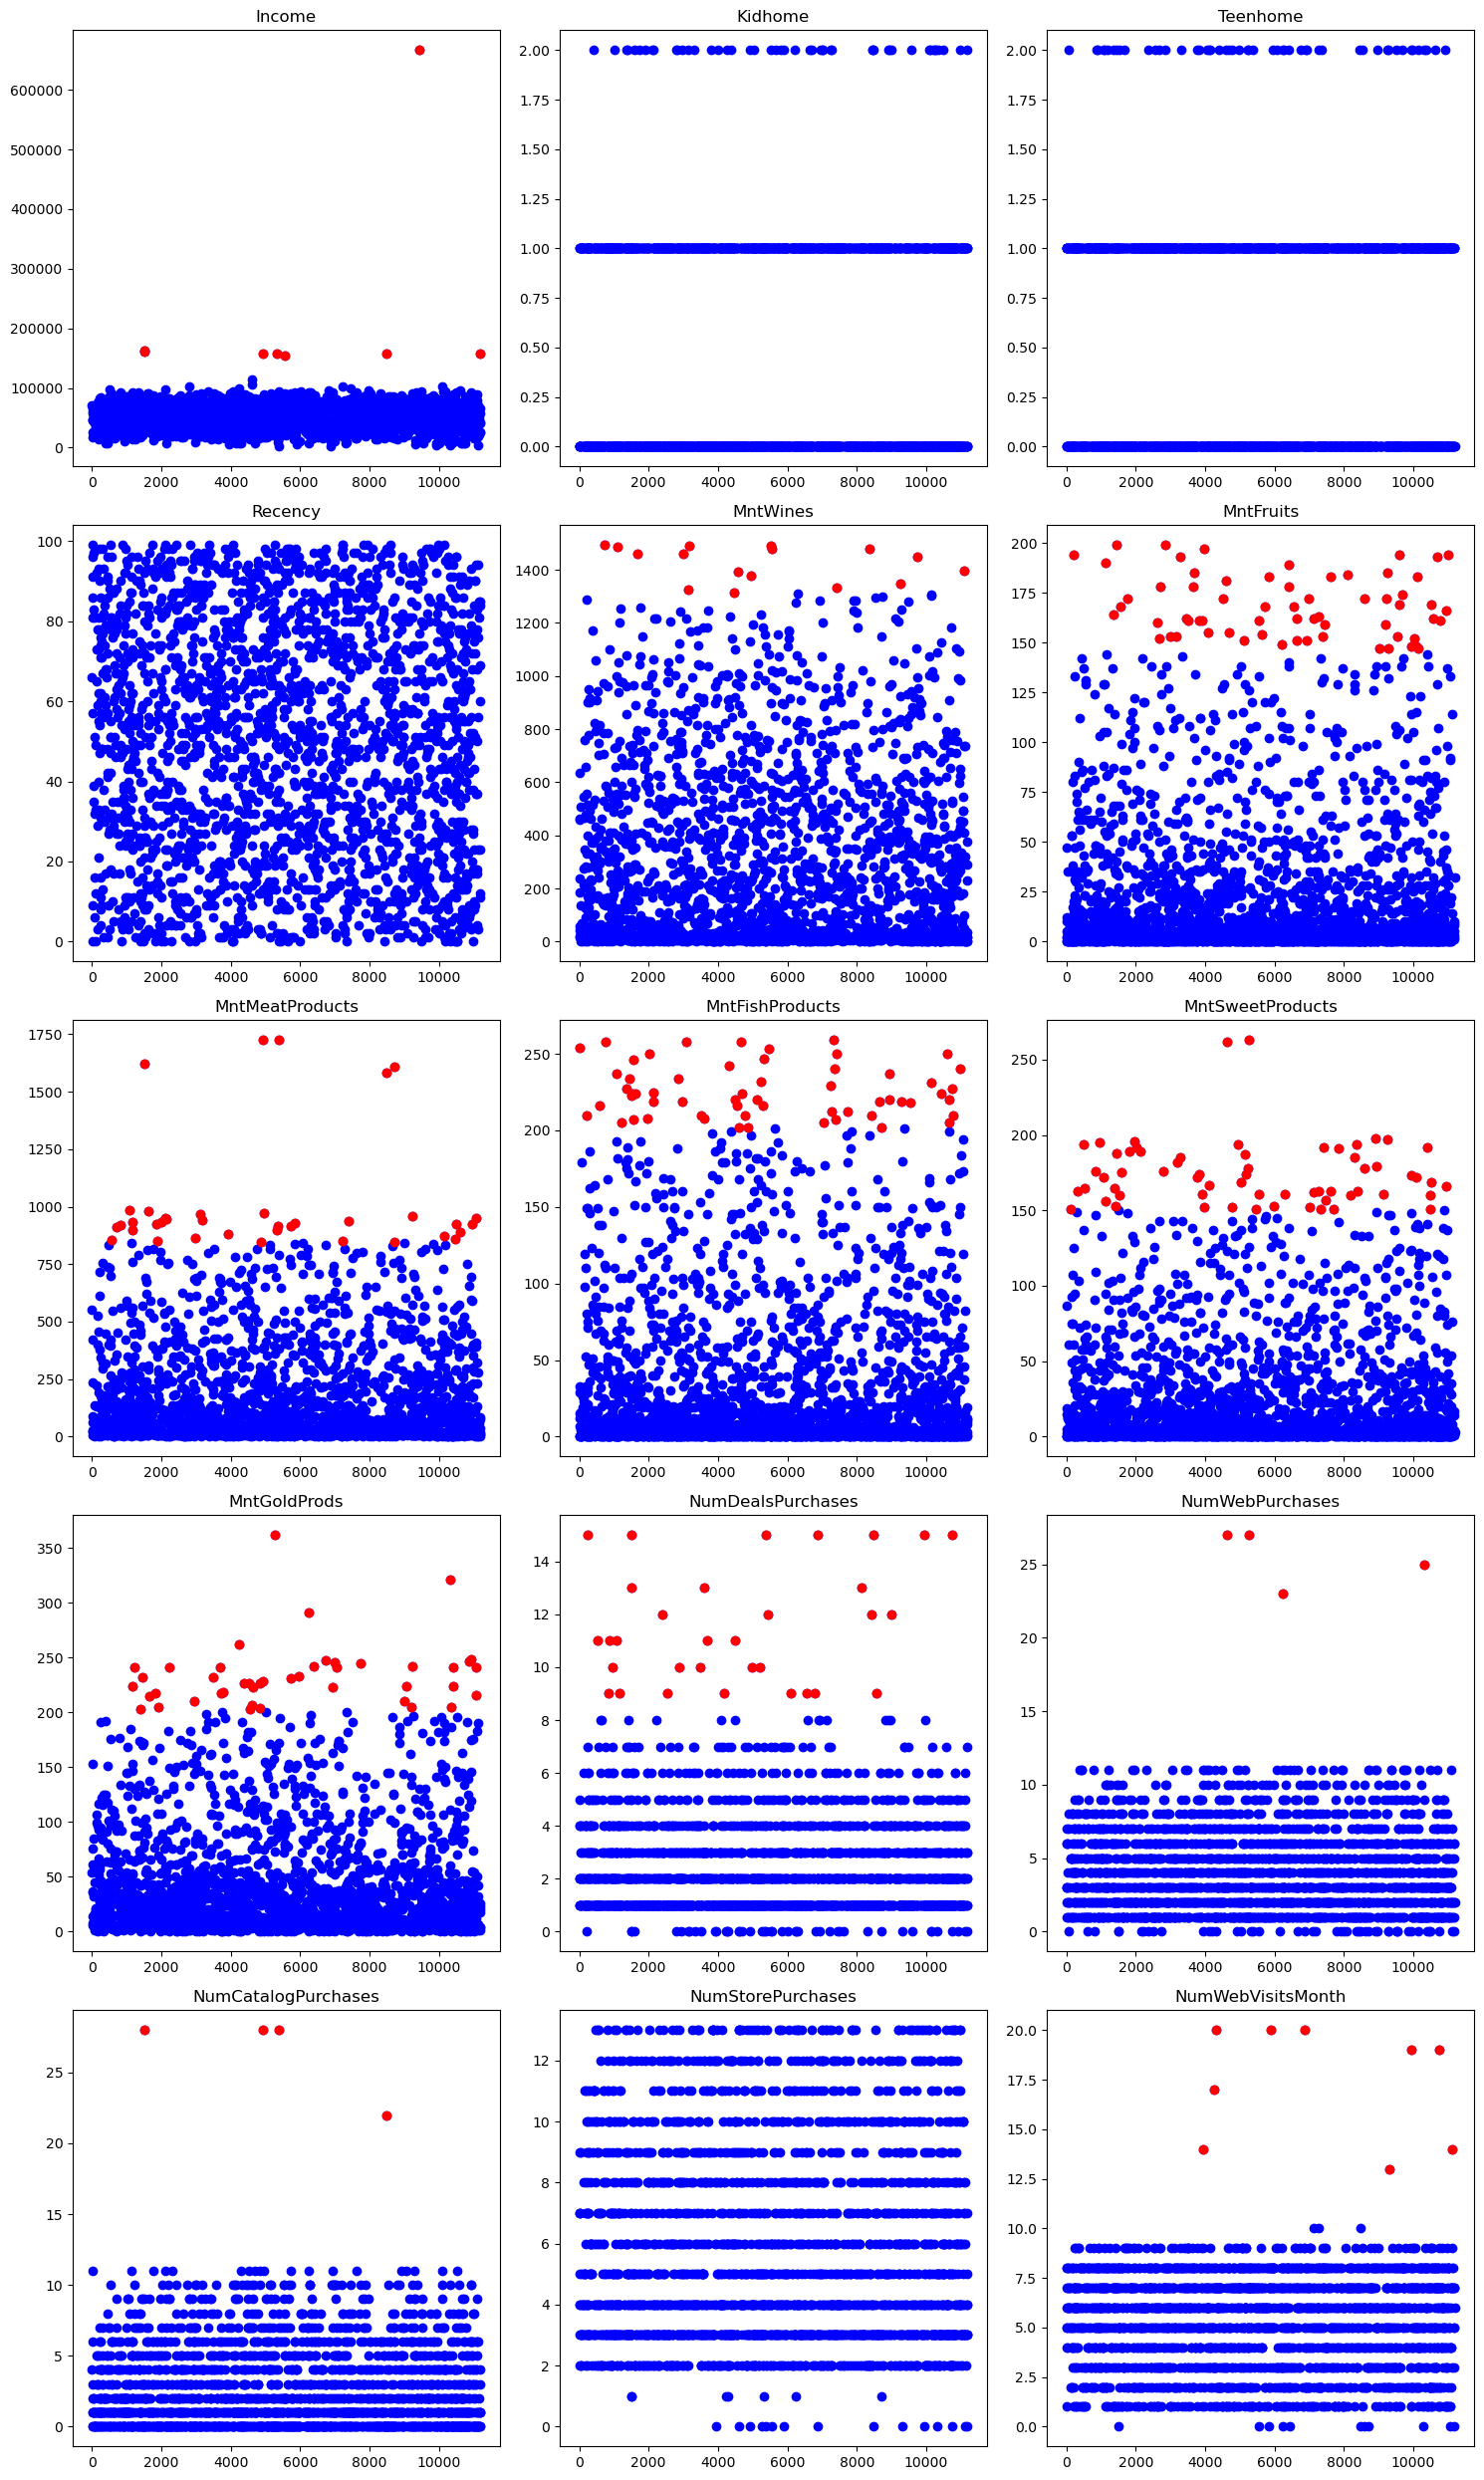

In [35]:
num_cols = len(numeric_data.columns)
num_rows = (num_cols + 2) // 3  # ceil(num_cols / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Iterate over each column and plot the outliers in red
for i, col in enumerate(numeric_data.columns):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]

    mean = np.mean(numeric_data[col])
    std = np.std(numeric_data[col])
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    # Plot all data points
    ax.scatter(numeric_data.index, numeric_data[col], c='b')

    # Get the indices of the outlier data points
    outlier_indices = numeric_data[(numeric_data[col] < lower_bound) | (numeric_data[col] > upper_bound)].index

    # Plot the outlier data points in red
    if len(outlier_indices) > 0:
        ax.scatter(outlier_indices, [numeric_data.loc[idx, col] for idx in outlier_indices], c='r')

    ax.set_title(col)

# Remove any unused subplots
for i in range(num_cols, num_rows*3):
    row_idx = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

**Checking for Imbalances**

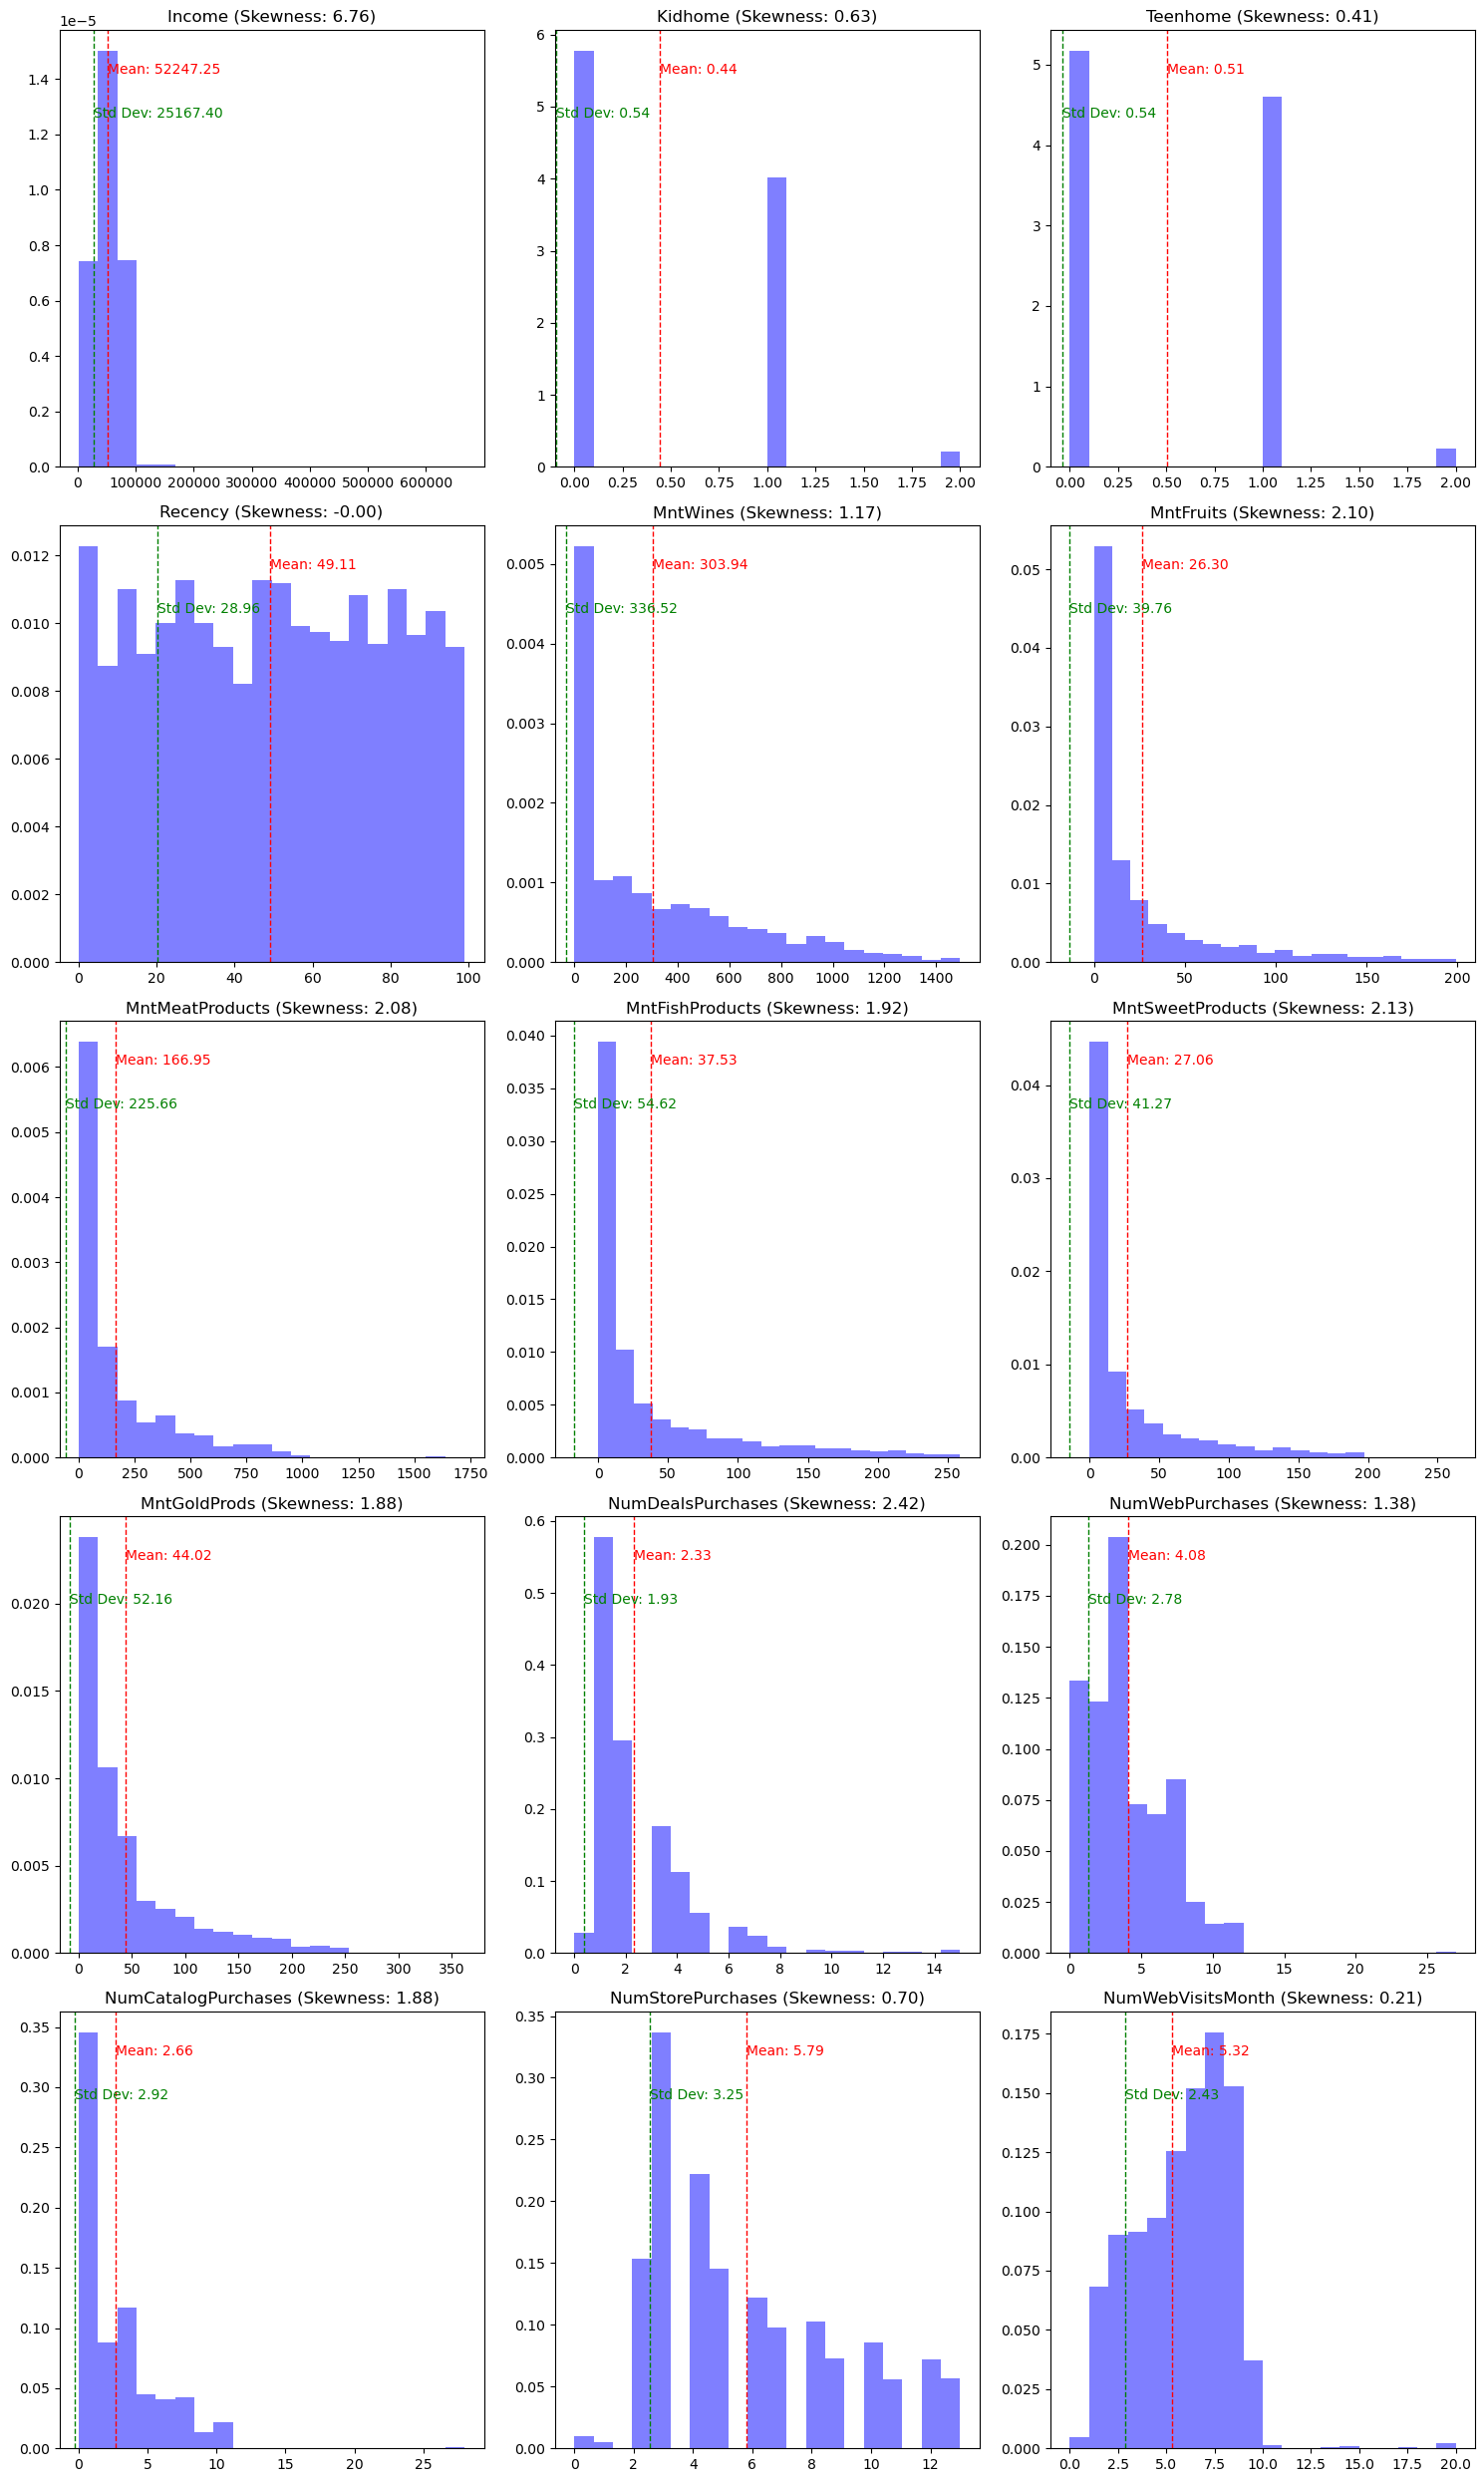

In [36]:
num_cols = len(numeric_data.columns)
num_rows = (num_cols + 2) // 3  # ceil(num_cols / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Iterate over each column and plot a histogram
for i, col in enumerate(numeric_data.columns):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]

    # Plot the histogram
    ax.hist(numeric_data[col].dropna(), bins=20, color='b', alpha=0.5, density=True)

    # Calculate the mean and standard deviation for annotation
    mean = np.mean(numeric_data[col])
    std = np.std(numeric_data[col])
    skewness = skew(numeric_data[col].dropna())


    # Add annotations for mean and standard deviation
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=1)
    ax.annotate(f'Mean: {mean:.2f}', xy=(mean, ax.get_ylim()[1] * 0.9), color='r')
    ax.axvline(mean - std, color='g', linestyle='dashed', linewidth=1)
    ax.annotate(f'Std Dev: {std:.2f}', xy=(mean - std, ax.get_ylim()[1] * 0.8), color='g')

    ax.set_title(f'{col} (Skewness: {skewness:.2f})')


# Remove any unused subplots
for i in range(num_cols, num_rows*3):
    row_idx = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

## Question 1b

In [37]:
numeric_data = numeric_data.dropna()

# Detect outliers using mean and standard deviation
for col in numeric_data.columns:
    mean = np.mean(numeric_data[col])
    std = np.std(numeric_data[col])
    lower_bound = mean - 3 *std
    upper_bound = mean + 3 * std
    numeric_data = numeric_data[(numeric_data[col] >= lower_bound) & (numeric_data[col] <= upper_bound)]

## Question 1c

| | Methodology Used | Underlying Rationale |
|--|--|--|
|Handling Outliers | Removed Data Points 3 SD away | More sensitive to outliers than IQR |
|Handling Missing Values| Utilised dropna | Allows removing data that has missing values from set |

## Question 1d

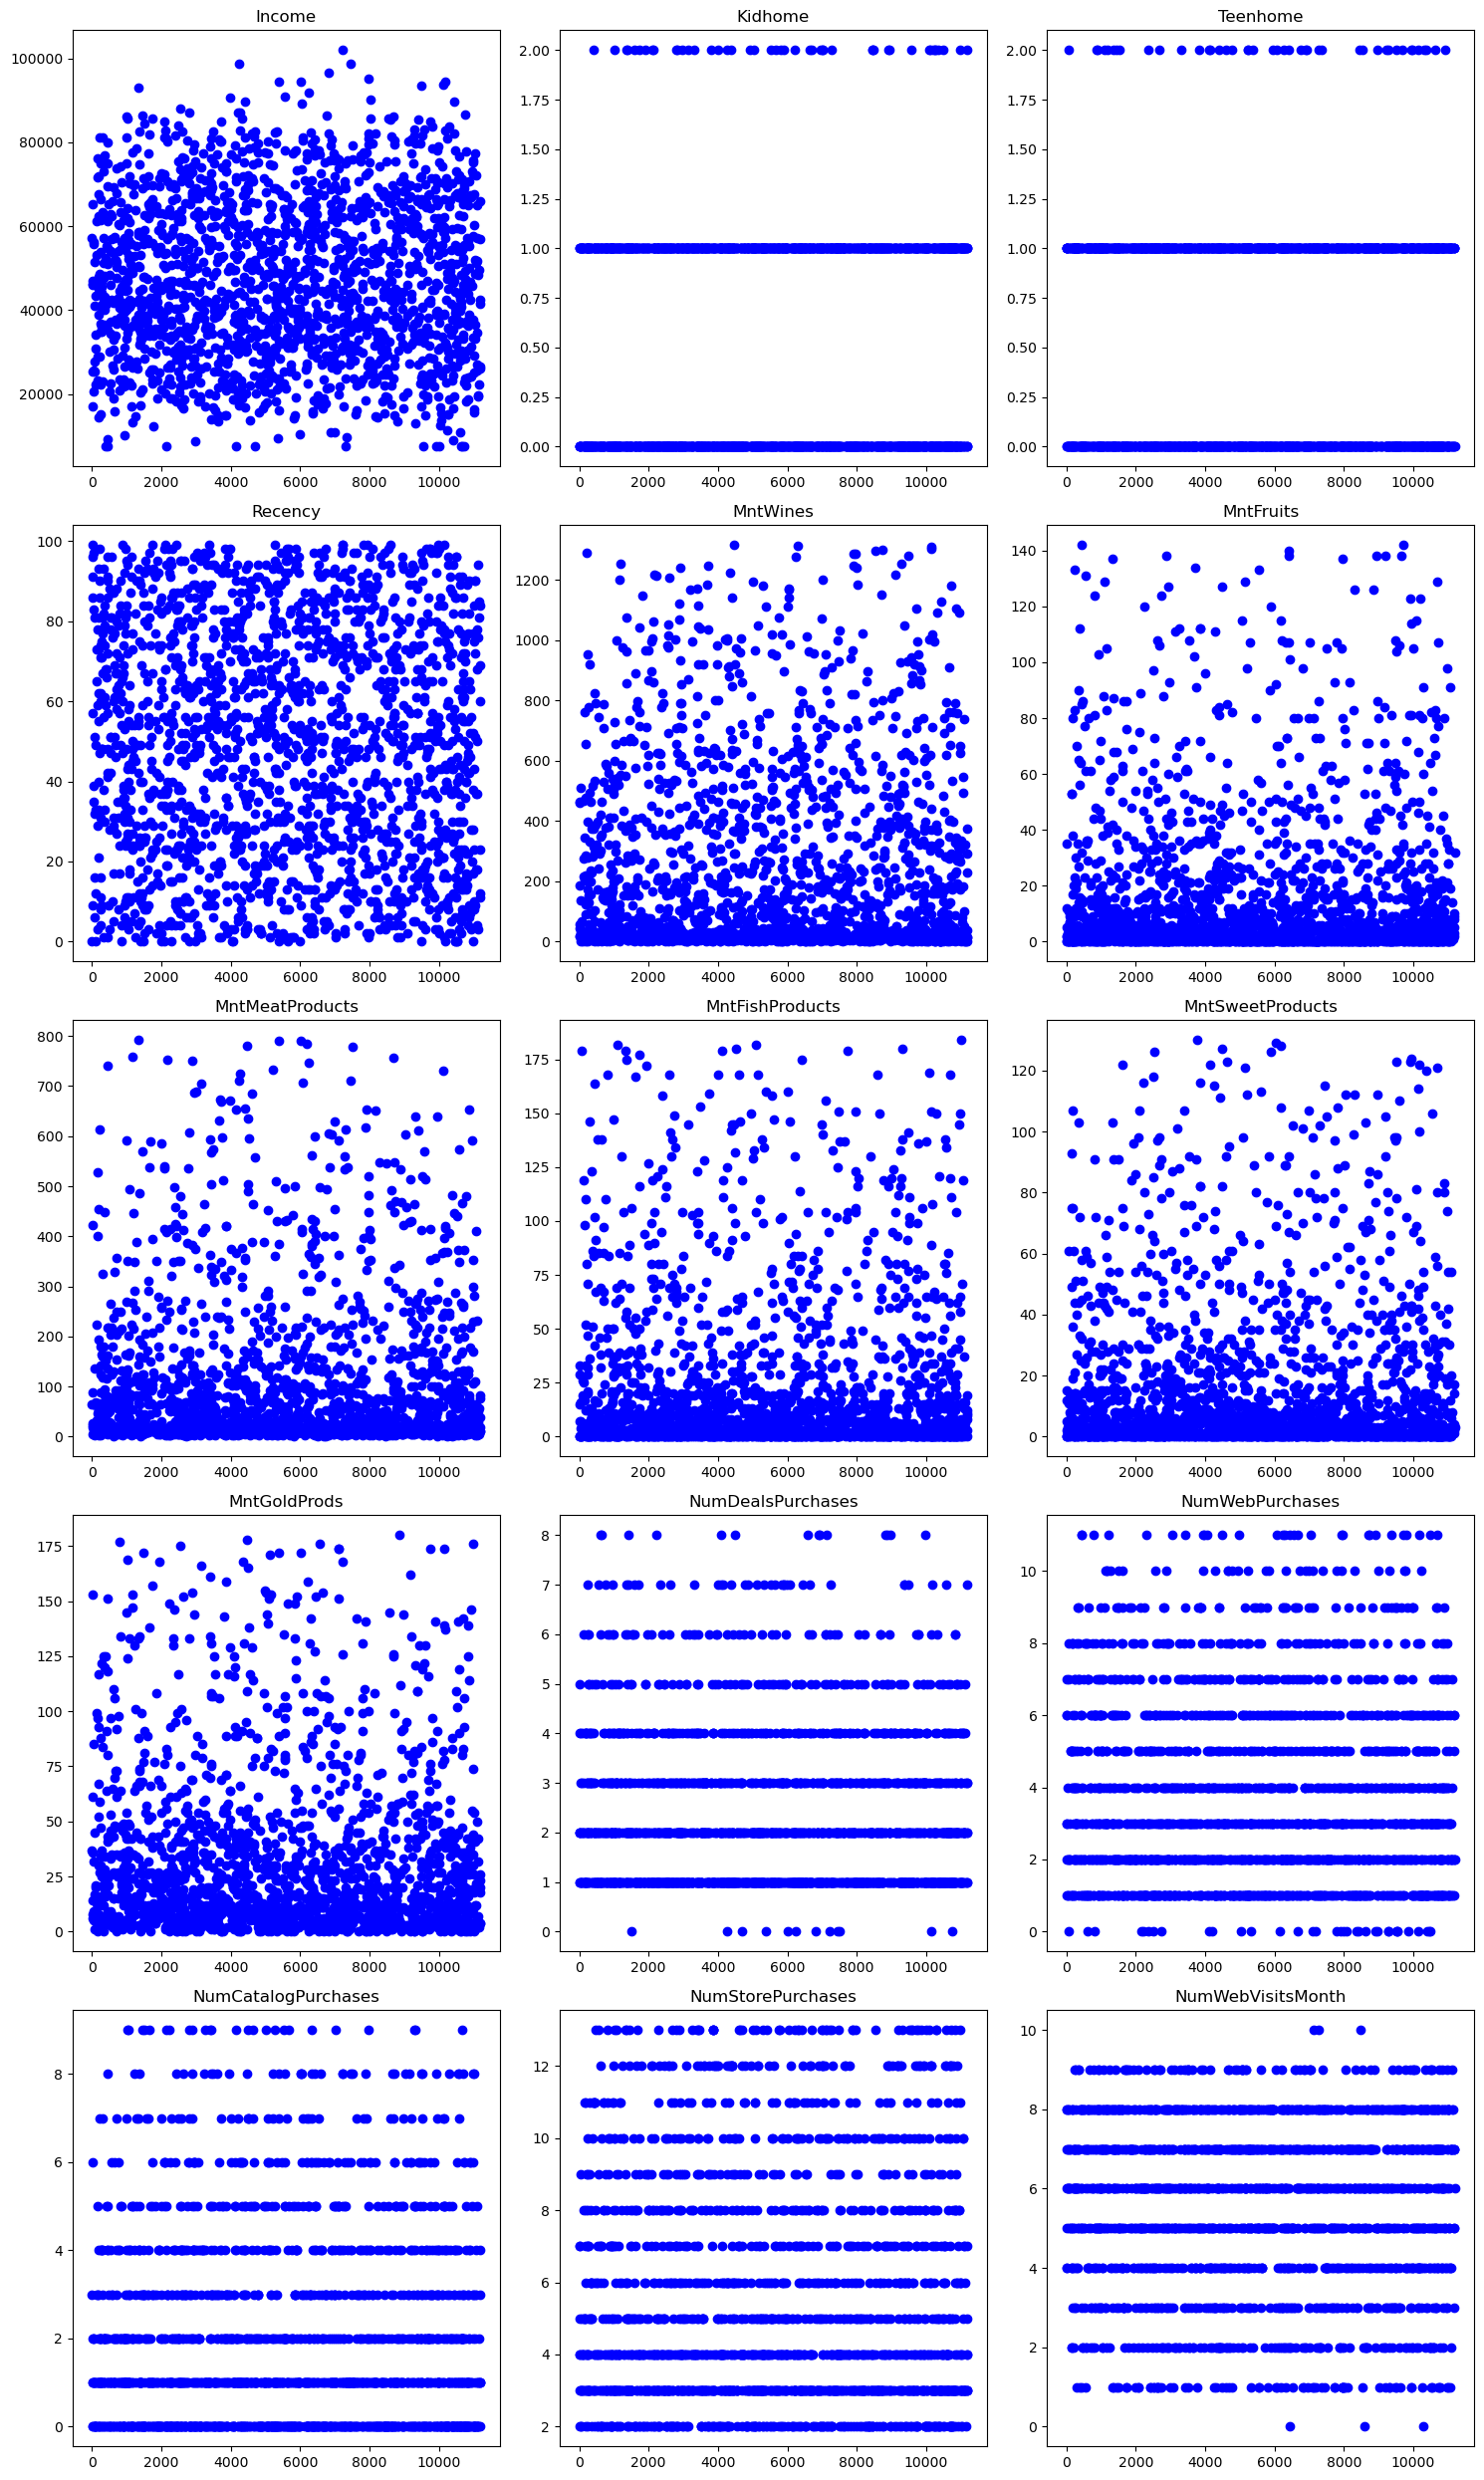

In [38]:
num_cols = len(numeric_data.columns)
num_rows = (num_cols + 2) // 3  # ceil(num_cols / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

for i, col in enumerate(numeric_data.columns):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]

    mean = np.mean(numeric_data[col])
    std = np.std(numeric_data[col])
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    # Plot all data points
    ax.scatter(numeric_data.index, numeric_data[col], c='b')
    ax.set_title(col)

# Remove any unused subplots
for i in range(num_cols, num_rows*3):
    row_idx = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

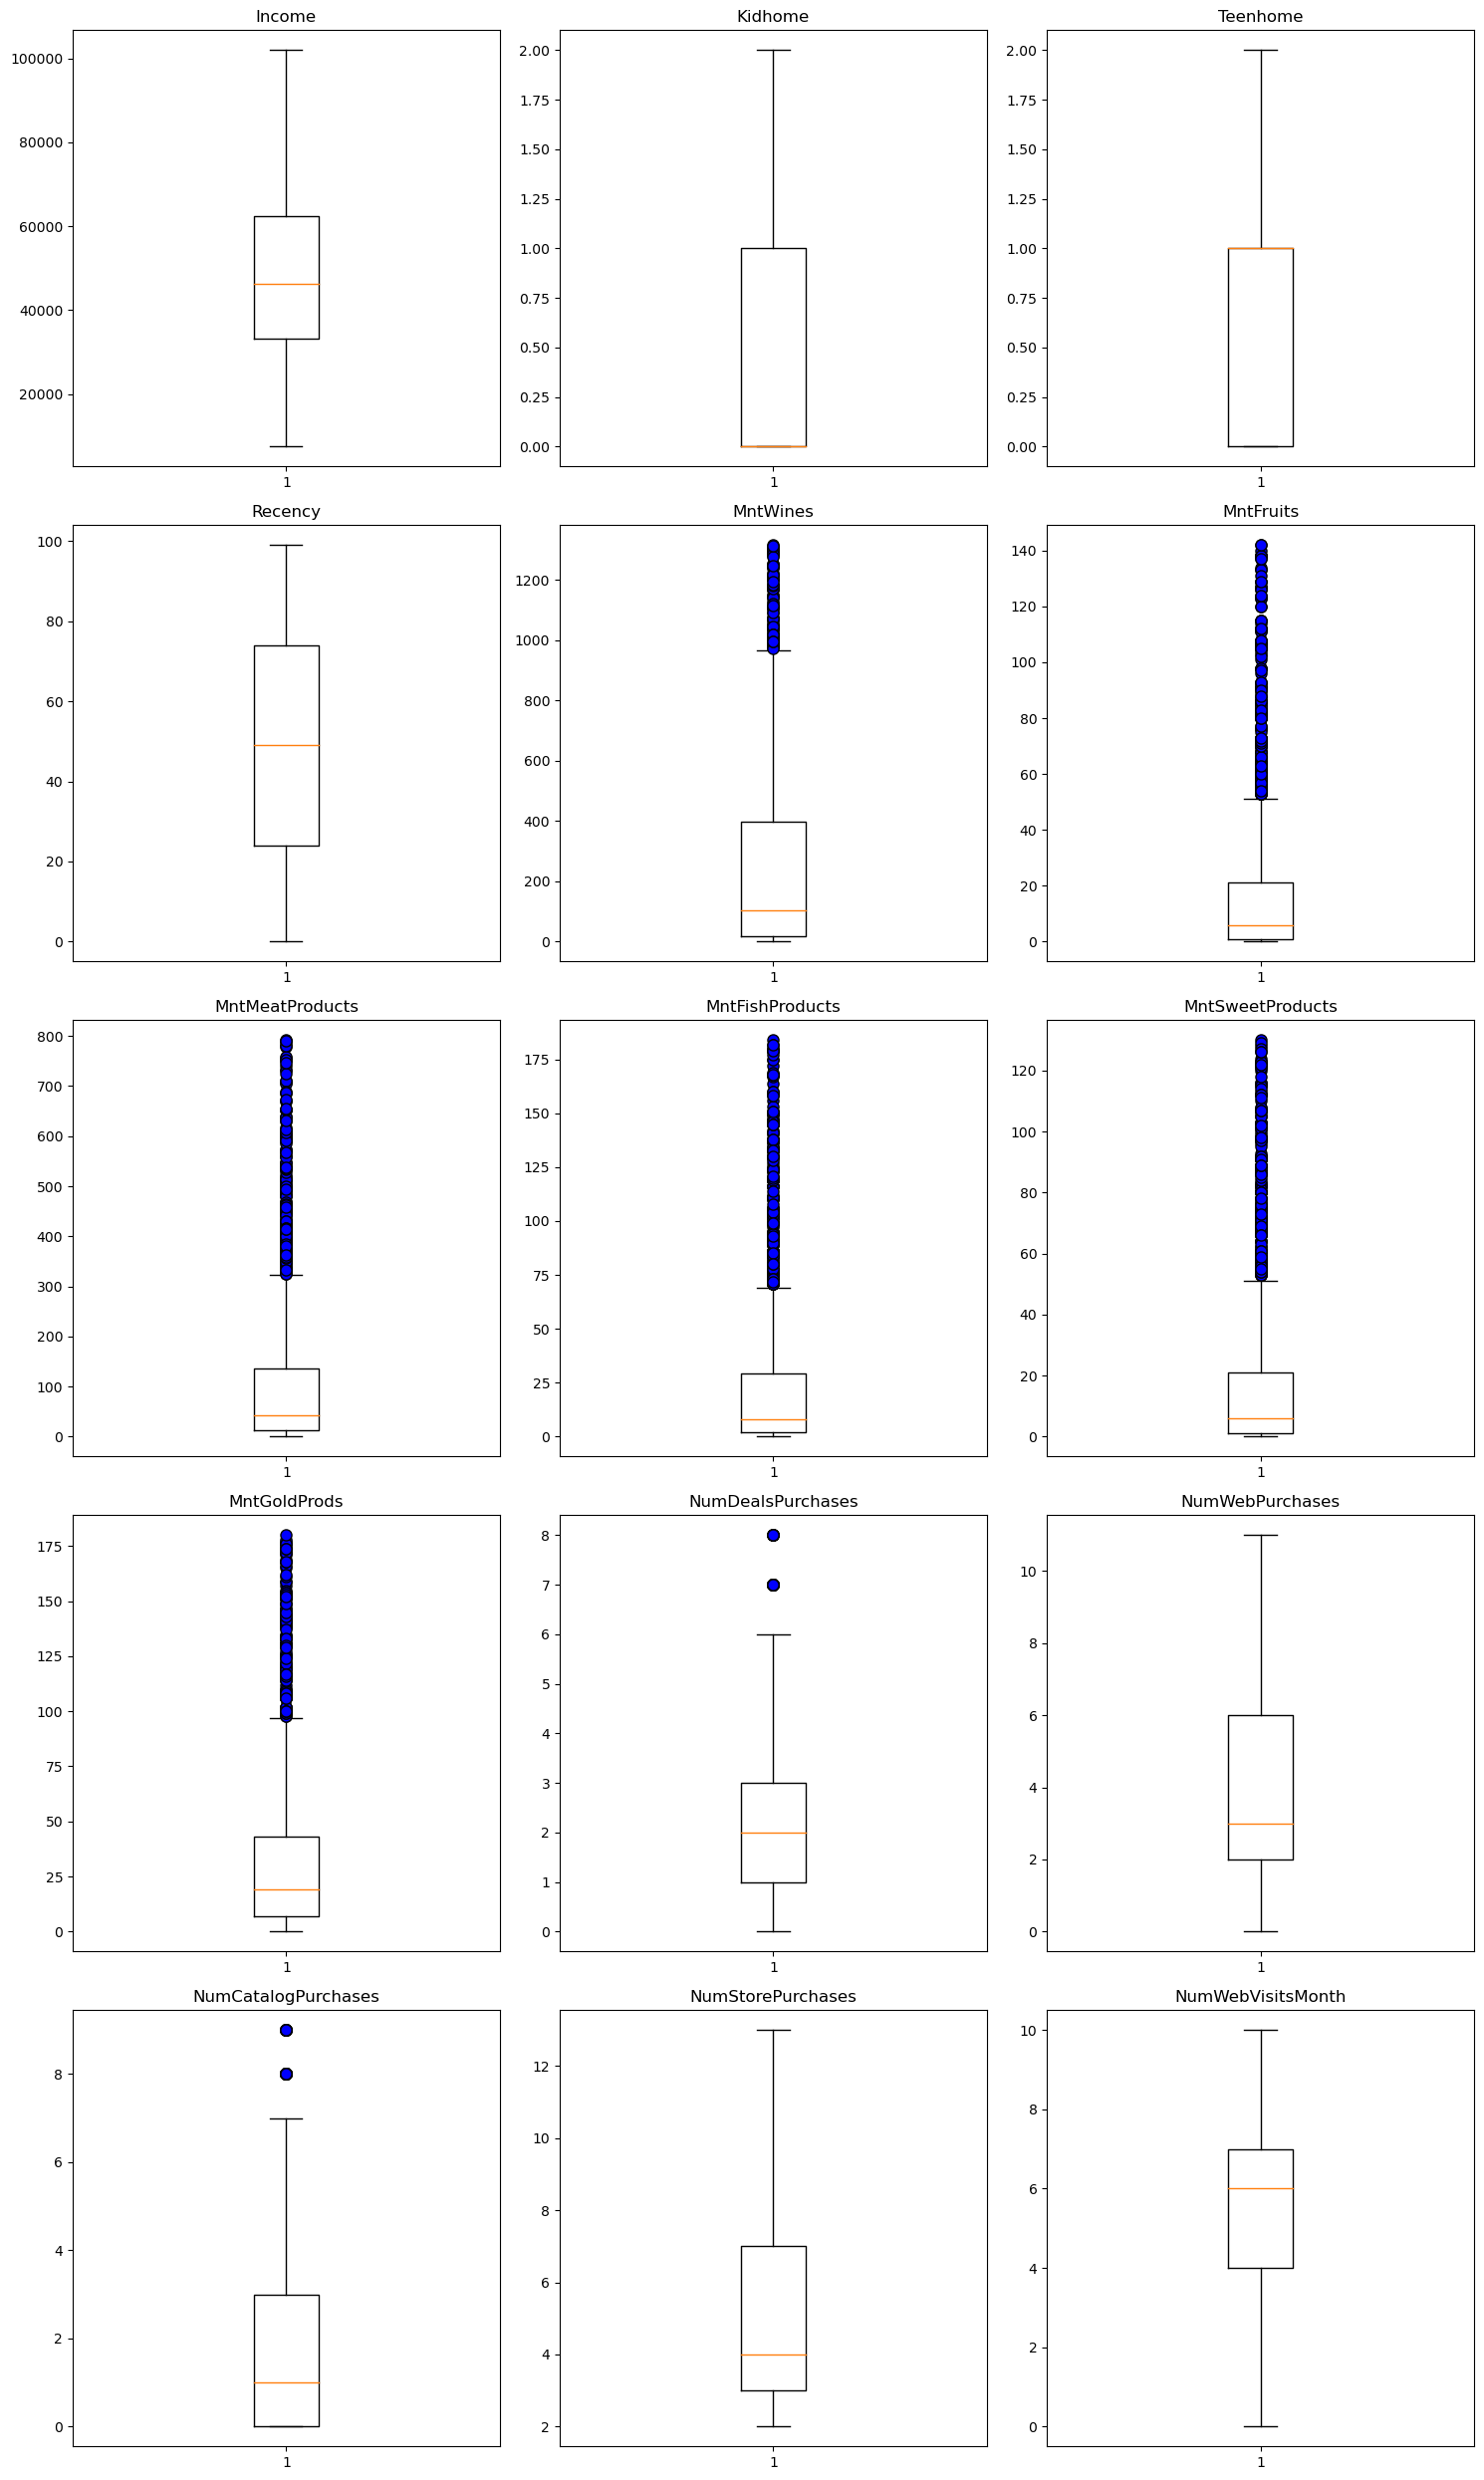

In [39]:
num_cols = len(numeric_data.columns)
num_rows = (num_cols + 2) // 3  # ceil(num_cols / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Iterate over each column and plot the outliers in red
for i, col in enumerate(numeric_data.columns):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]
    ax.boxplot(numeric_data[col], whis=1.5, showfliers=True, flierprops=dict(marker='o', markerfacecolor='blue', markersize=8))
    ax.set_title(col)

# Remove any unused subplots
for i in range(num_cols, num_rows*3):
    row_idx = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

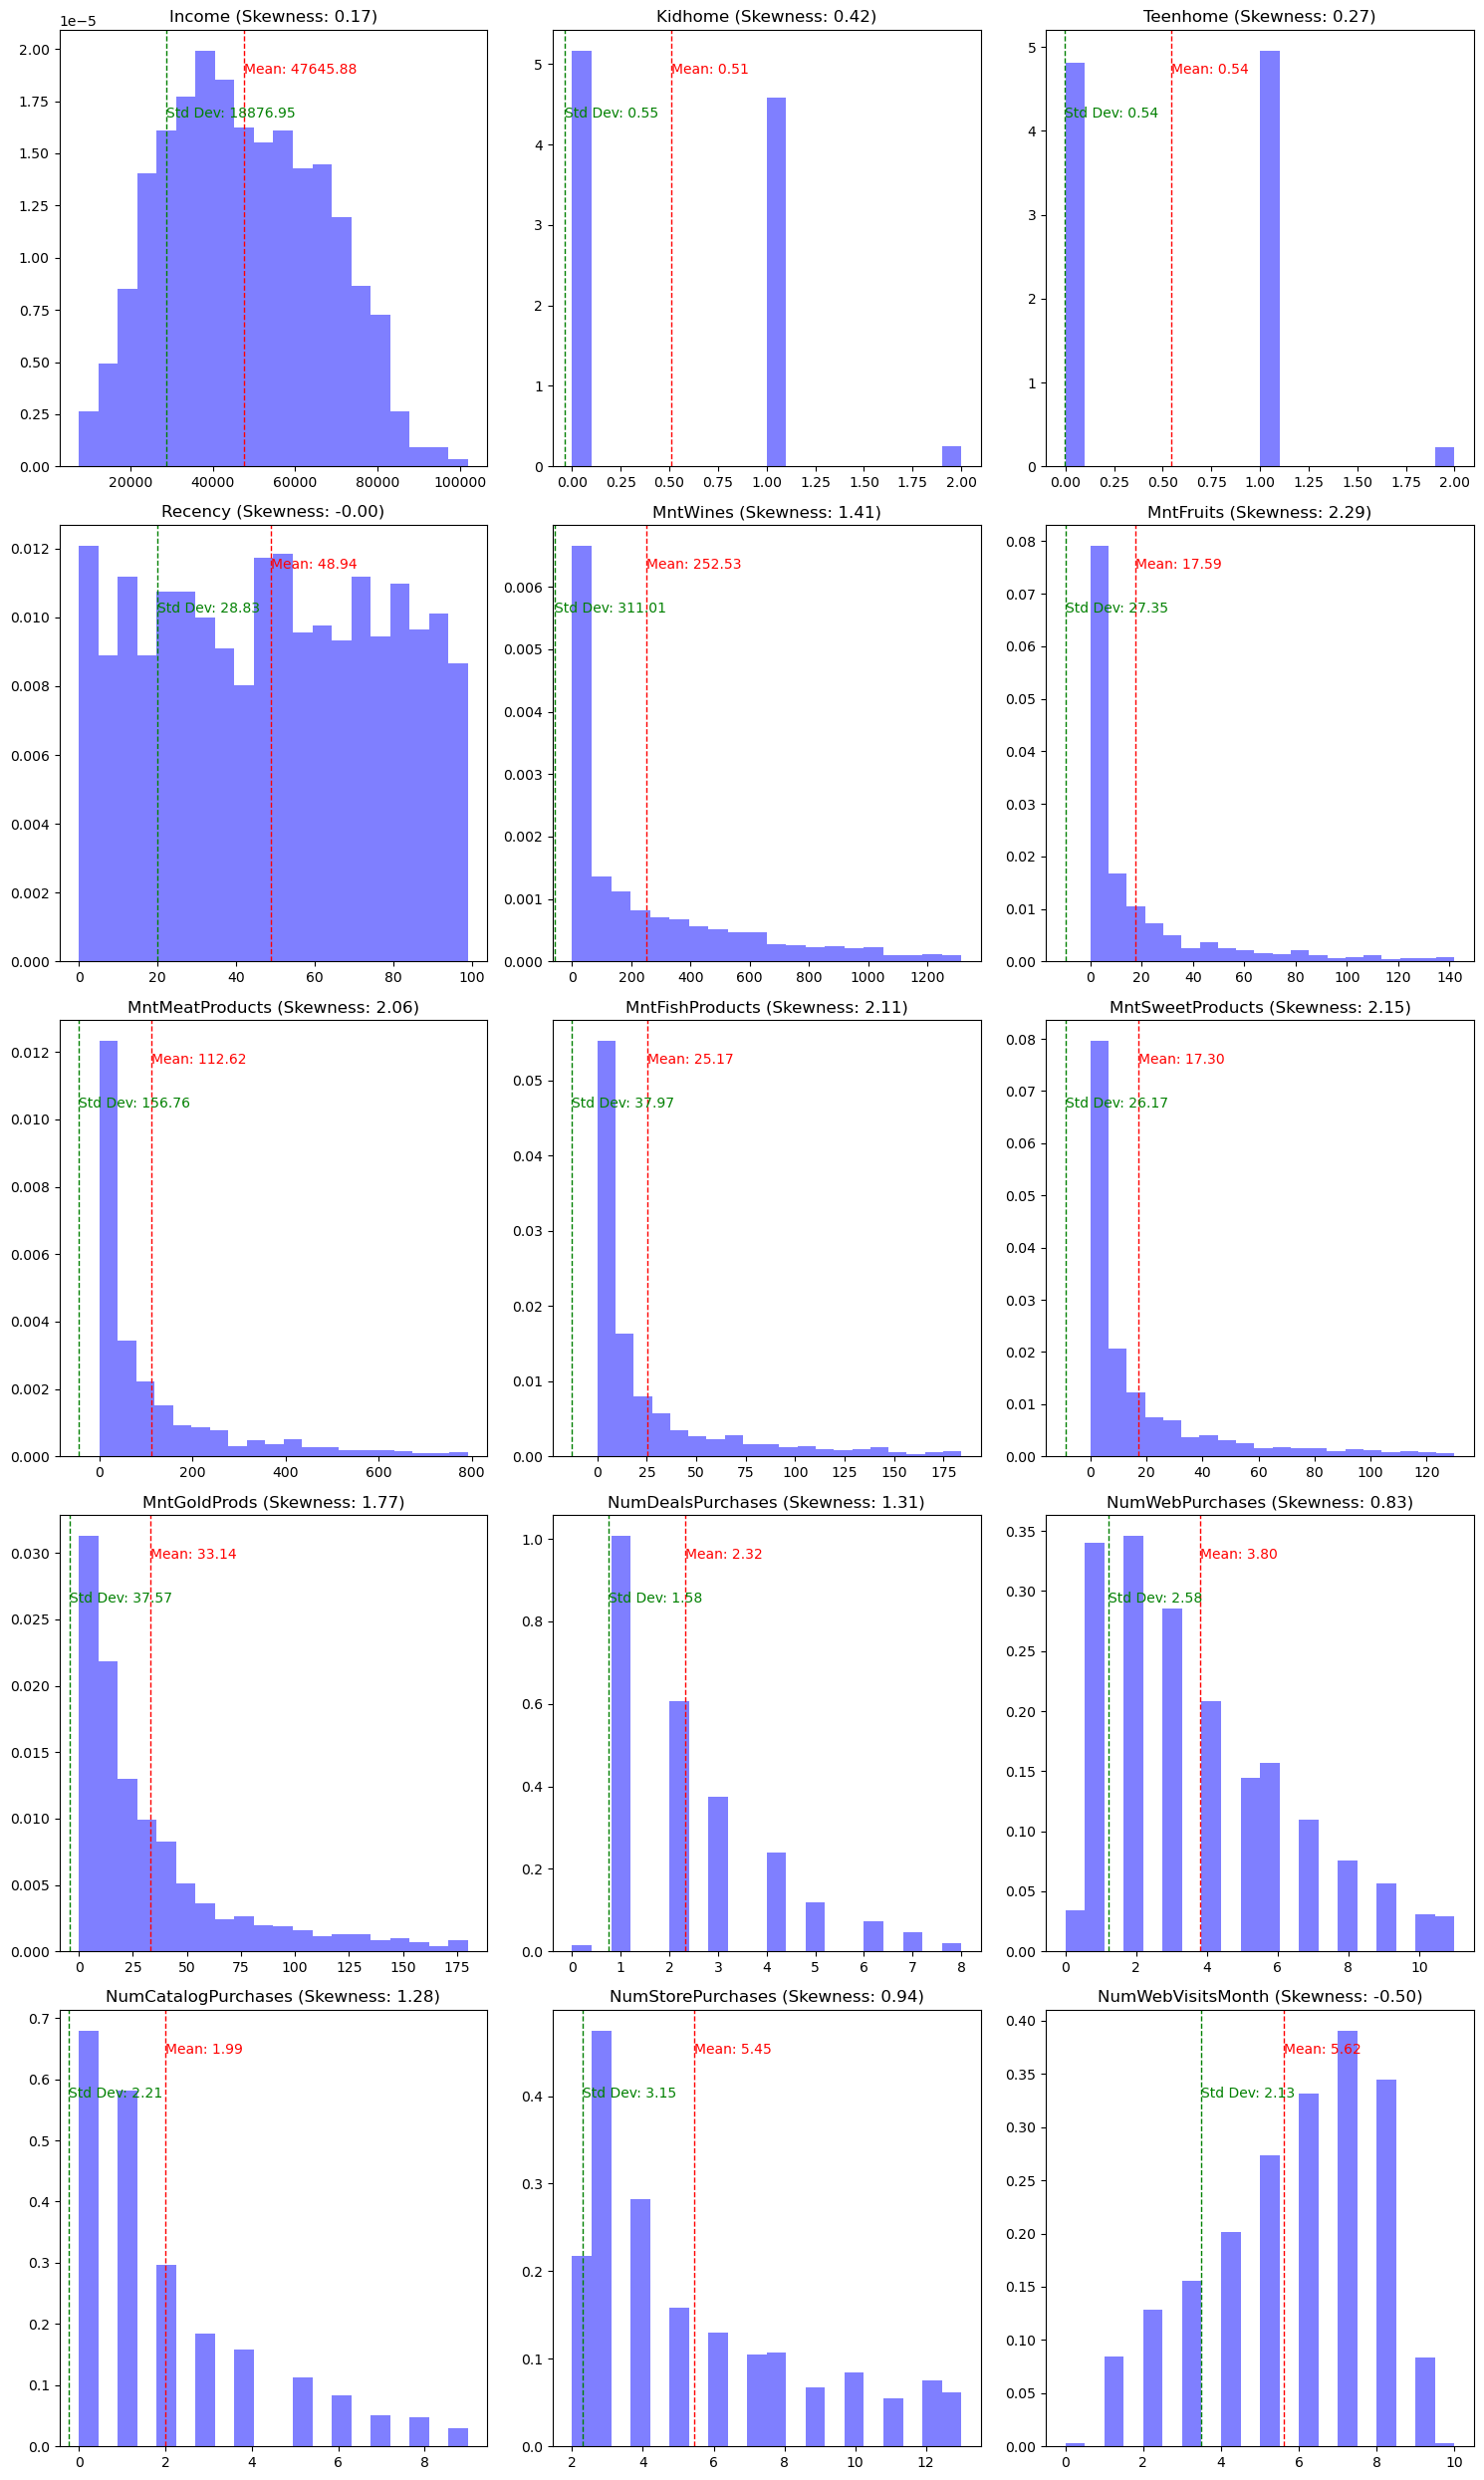

In [40]:
num_cols = len(numeric_data.columns)
num_rows = (num_cols + 2) // 3  # ceil(num_cols / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Iterate over each column and plot a histogram
for i, col in enumerate(numeric_data.columns):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]

    # Plot the histogram
    ax.hist(numeric_data[col].dropna(), bins=20, color='b', alpha=0.5, density=True)

    # Calculate the mean and standard deviation for annotation
    mean = np.mean(numeric_data[col])
    std = np.std(numeric_data[col])
    skewness = skew(numeric_data[col].dropna())


    # Add annotations for mean and standard deviation
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=1)
    ax.annotate(f'Mean: {mean:.2f}', xy=(mean, ax.get_ylim()[1] * 0.9), color='r')
    ax.axvline(mean - std, color='g', linestyle='dashed', linewidth=1)
    ax.annotate(f'Std Dev: {std:.2f}', xy=(mean - std, ax.get_ylim()[1] * 0.8), color='g')

    ax.set_title(f'{col} (Skewness: {skewness:.2f})')


# Remove any unused subplots
for i in range(num_cols, num_rows*3):
    row_idx = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

## Question 1e

**Answer:**

| | Pattern/Anomalies Observed | Respective Insights based on Observation |
|--|--|--|
| Pattern 1 | "Amt" Data Generally Right Skewed | Consider a Log Transformation to make data more normally distributed|
| Pattern 2 | The mean and the standard deviation is similar | Data is clustered around the center |
| Pattern 3 | (Fill in the blank) | (Fill in the blank) |

## Question 2a

***

| Column | Data Type | Data Preprocessing |
|--|--|--|
ID                 | Nominal | NA |
Year_Birth         | Ordial | Convert to age and then Normalisaton |      
Education          | Ordial | One Hot Encoding |       
Marital_Status     | Nominal | One Hot Encoding |
Income             | Discrete | Normalization |      
Kidhome            | Discrete | Normalization |        
Teenhome           | Discrete | Normalization |   
Dt_Customer        | Ordial | NA |      
Recency            | Discrete | Normalization |     
MntWines           | Discrete | Feature Engineering |    
MntFruits          | Discrete | Feature Engineering |    
MntMeatProducts    | Discrete | Feature Engineering |     
MntFishProducts    | Discrete | Feature Engineering |    
MntSweetProducts   | Discrete | Feature Engineering |    
MntGoldProds       | Discrete | Feature Engineering |
NumDealsPurchases  | Discrete | Feature Engineering |  
NumWebPurchases    | Discrete | Feature Engineering |
NumCatalogPurchases| Discrete | Feature Engineering |
NumStorePurchases  | Discrete | Feature Engineering |  
NumWebVisitsMonth  | Discrete | Feature Engineering |  
AcceptedCmp3       | Discrete | NA |  
AcceptedCmp4       | Discrete | NA |       
AcceptedCmp5       | Discrete | NA |       
AcceptedCmp1       | Discrete | NA |       
AcceptedCmp2       | Discrete | NA |       
Complain           | Discrete | NA |       
Z_CostContact      | Discrete | Drop |     
Z_Revenue          | Discrete | Drop |          
Response           | Discrete | NA |


**Determining Age**

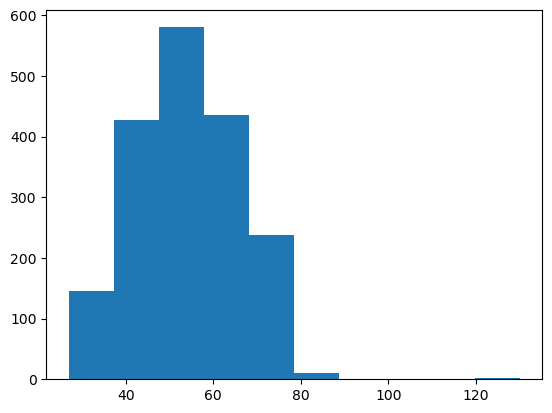

In [41]:
age = 2023 - data['Year_Birth']
age.name = 'Age'
age = age.loc[numeric_data.index]
plt.hist(age, bins=10)

numeric_data = pd.concat([numeric_data, age], axis='columns')

**Normalization**

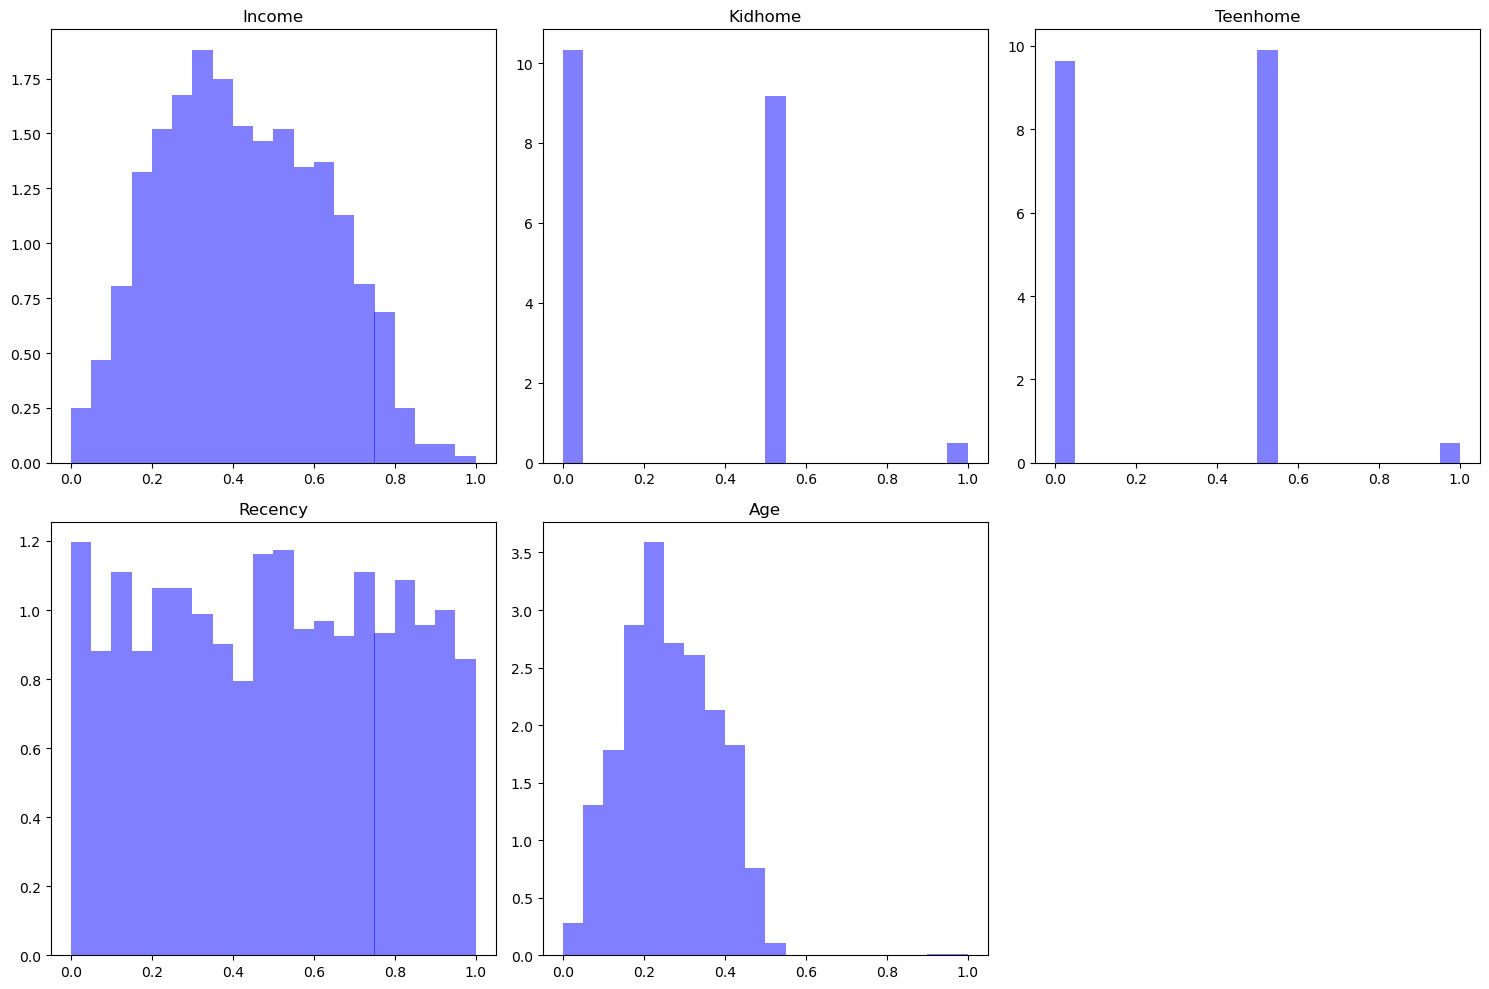

In [42]:
from sklearn.preprocessing import MinMaxScaler
cols_to_normalize = ["Income", "Kidhome", "Teenhome", "Recency", 'Age']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the selected columns
normalized_data = numeric_data[cols_to_normalize].copy()
normalized_data[cols_to_normalize] = scaler.fit_transform(normalized_data[cols_to_normalize])

# Create a matrix of subplots with at most 3 plots per row
num_cols = len(cols_to_normalize)
num_rows = (num_cols + 2) // 3  # ceil(num_cols / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Iterate over each column and plot a histogram
for i, col in enumerate(cols_to_normalize):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]

    # Plot the histogram
    ax.hist(normalized_data[col], bins=20, color='b', alpha=0.5, density=True)

    # Add annotations for mean, standard deviation, and skewness
    ax.set_title(col)

# Remove any unused subplots
for i in range(len(cols_to_normalize), num_rows*3):
    row_idx = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

**Feature Engineering** <br>
Attempt 1: Log Transformation

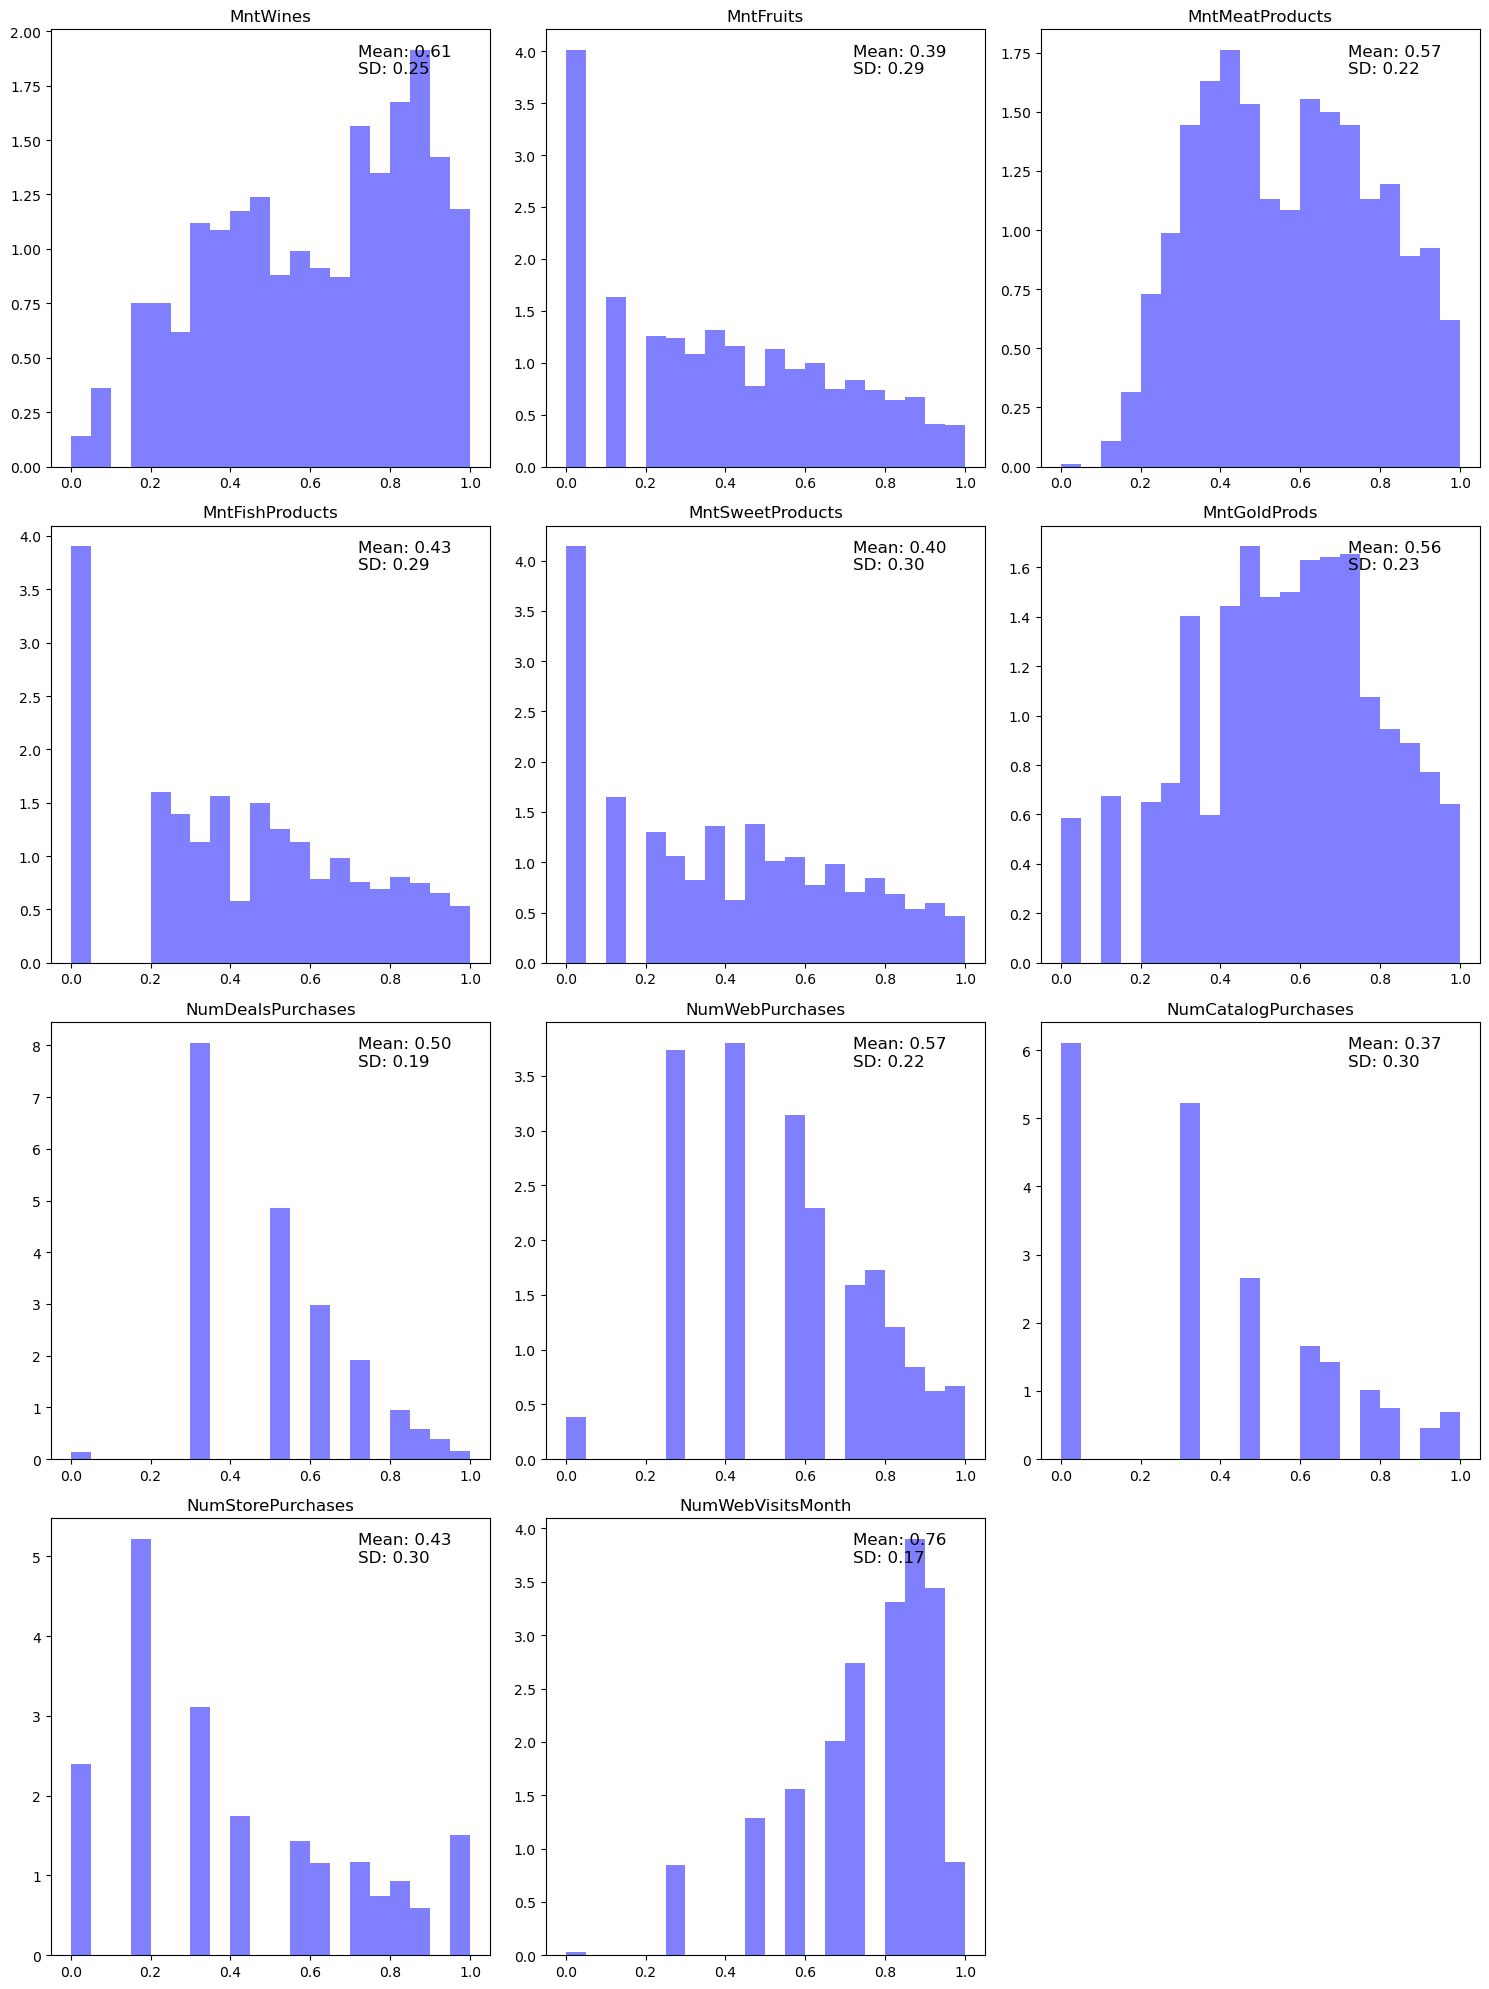

In [43]:
# Specify the columns to log-transform and normalize
cols_to_log_normalize = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
                         "MntSweetProducts", "MntGoldProds", "NumDealsPurchases",
                         "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",
                         "NumWebVisitsMonth"]

# Log-transform the selected columns
log_transformed_data = numeric_data[cols_to_log_normalize].copy()
log_transformed_data[cols_to_log_normalize] = np.log(log_transformed_data[cols_to_log_normalize] + 1)

# Normalize the log-transformed columns
scaler = MinMaxScaler()
log_normalized_data = log_transformed_data.copy()
log_normalized_data[cols_to_log_normalize] = scaler.fit_transform(log_transformed_data[cols_to_log_normalize])

# Create a matrix of subplots with at most 3 plots per row
num_cols = len(cols_to_log_normalize)
num_rows = (num_cols + 2) // 3  # ceil(num_cols / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Iterate over each column and plot a histogram with mean and standard deviation annotations
for i, col in enumerate(cols_to_log_normalize):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]

    # Plot the histogram
    ax.hist(log_normalized_data[col], bins=20, color='b', alpha=0.5, density=True)

    # Add annotations for mean and standard deviation
    mean = np.mean(log_normalized_data[col])
    std = np.std(log_normalized_data[col])
    ax.annotate(f"Mean: {mean:.2f}\nSD: {std:.2f}", xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12)

    ax.set_title(col)

# Remove any unused subplots
for i in range(len(cols_to_log_normalize), num_rows*3):
    row_idx = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

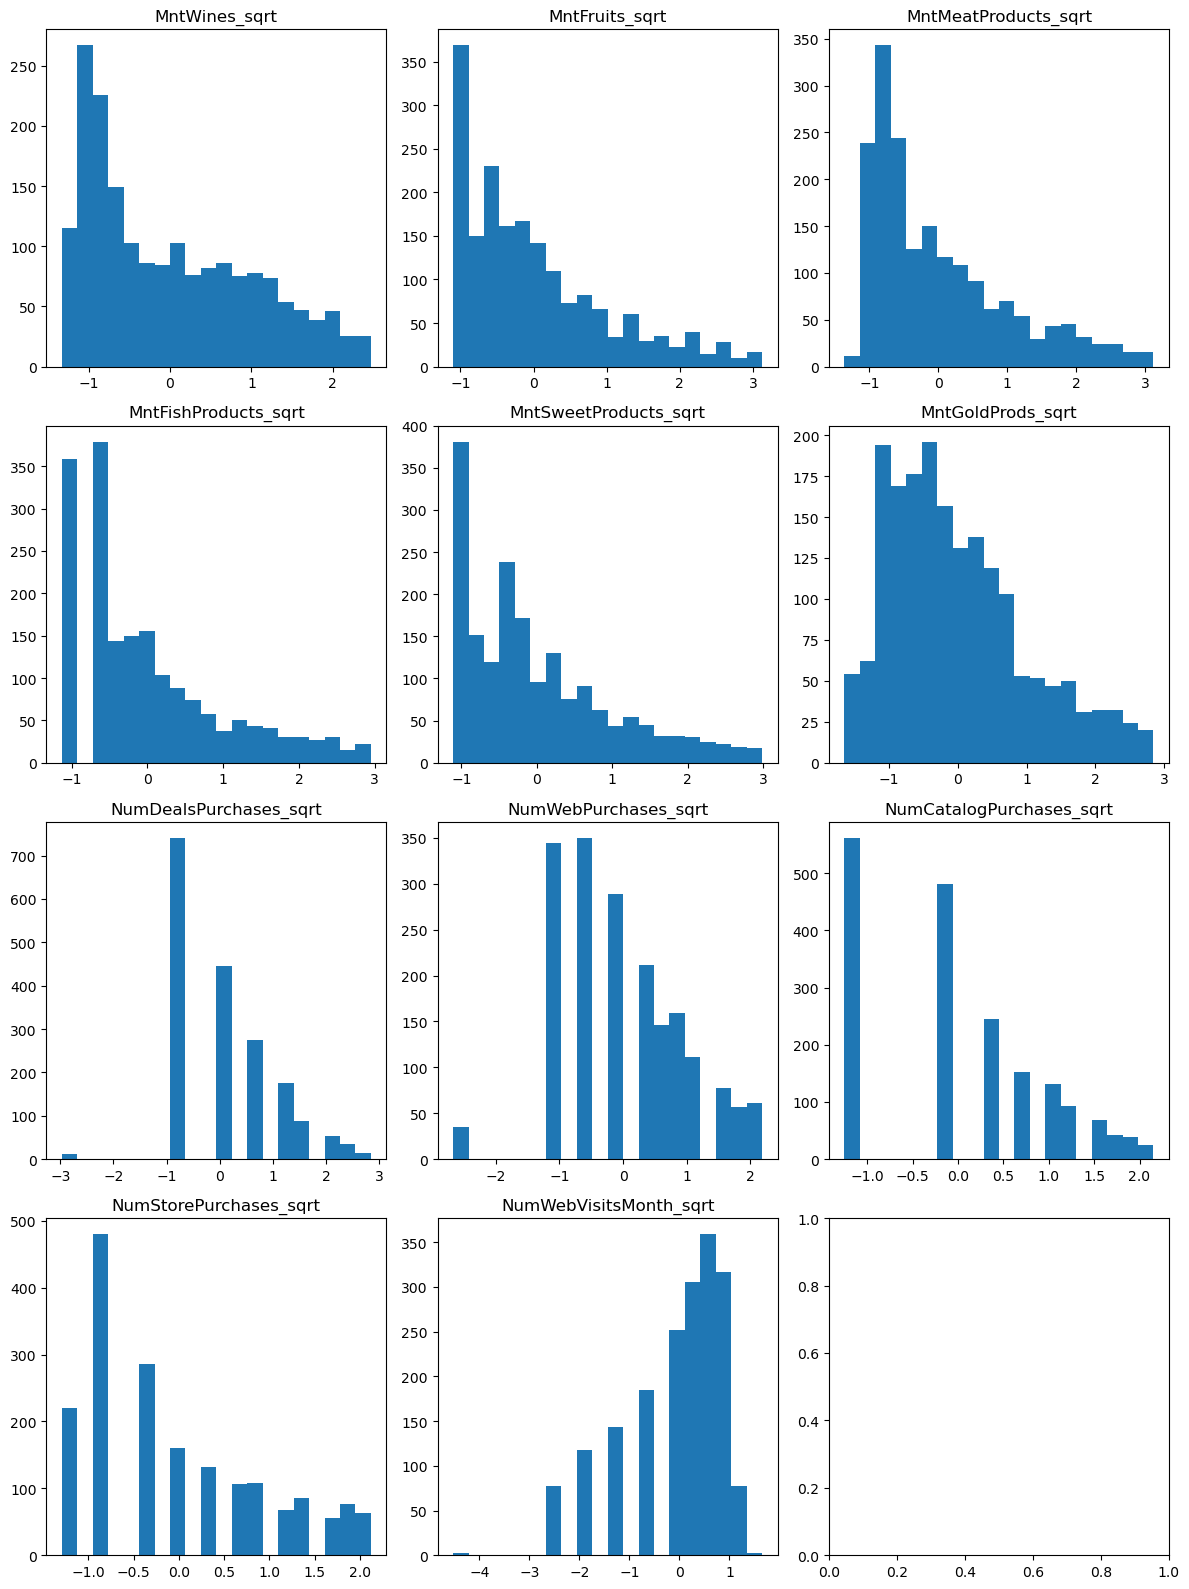

In [44]:
vars_to_transform = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
                         "MntSweetProducts", "MntGoldProds", "NumDealsPurchases",
                         "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",
                         "NumWebVisitsMonth"]


# Apply the square root transformation to the selected variables and store in a new dataframe
transformed_data = pd.DataFrame()
for var in vars_to_transform:
    transformed_data[var+'_sqrt'] = np.sqrt(numeric_data[var])

# Normalize the transformed variables using a StandardScaler
scaler = StandardScaler()
transformed_data_normalized = pd.DataFrame(scaler.fit_transform(transformed_data), columns=transformed_data.columns)

# Plot histograms of the transformed variables
n_rows = np.ceil(len(transformed_data.columns) / 3).astype(int)
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(12, 4*n_rows))
for i, col in enumerate(transformed_data.columns):
    row_idx = i // 3
    col_idx = i % 3
    axs[row_idx, col_idx].hist(transformed_data_normalized[col], bins=20)
    axs[row_idx, col_idx].set_title(col)
plt.tight_layout()
plt.show()

**One Hot Encoding**

In [45]:
# Create an empty dataframe to hold the encoded data
encoded_data = pd.DataFrame()

# Define the columns to one-hot encode
cols_to_encode = ['Education', 'Marital_Status']

# One-hot encode the specified columns
for col in cols_to_encode:
    unique_vals = data[col].unique()
    for val in unique_vals:
        encoded_data[f'{col}_{val}'] = (data[col] == val).astype(int)

# Print the first few rows of the encoded data
encoded_data.head()

,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Single,Marital_Status_Together,Marital_Status_Married,Marital_Status_Divorced,Marital_Status_Widow,Marital_Status_Alone,Marital_Status_Absurd,Marital_Status_YOLO
ID,,,,,,,,,,,,,
5524,1,0,0,0,0,1,0,0,0,0,0,0,0
2174,1,0,0,0,0,1,0,0,0,0,0,0,0
4141,1,0,0,0,0,0,1,0,0,0,0,0,0
6182,1,0,0,0,0,0,1,0,0,0,0,0,0
5324,0,1,0,0,0,0,0,1,0,0,0,0,0


In [46]:
# categorical_columns = data.columns.difference(numeric_columns)
# categorical_data = data[categorical_columns]

# variables = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
# Y = data[variables].sum(axis='columns')
# Y.name = 'NumAcceptedCmp'


# categorical_data = pd.concat([categorical_data, Y], axis='columns')
# categorical_data

In [47]:
# Remove the outliers from the categorical data as we previously did for the numeric 
encoded_data = encoded_data.loc[numeric_data.index]
Y = Y.loc[numeric_data.index]

In [48]:
features = pd.concat([normalized_data, log_normalized_data, encoded_data], axis='columns')
features.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Education_Graduation', 'Education_PhD', 'Education_Master',
       'Education_Basic', 'Education_2n Cycle', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Married',
       'Marital_Status_Divorced', 'Marital_Status_Widow',
       'Marital_Status_Alone', 'Marital_Status_Absurd', 'Marital_Status_YOLO'],
      dtype='object')

## Question 3 & 4
***
The given data is heavily skewed to clients who do not purchase anything (Y = 0) (See below). Therefore, to get a better understanding of the data I have decided to split the customers who purchase goods vs who do not to allow for more comprehensive models. The Y predictor value will be set to 1 if the customer purchases at all and to 0 if there is no purchase. <br>

Next, to get a better understanding of the data, we will take equal amounts of clients purchasing and clients not purchasing data. This method is justifiable because the proprotion skewness is not extremely disproportionate and this also reduces training bias

In [49]:
print ("Number of 0s vs 1s:", len(Y[Y == 0]), len(Y[Y == 1]))

Number of 0s vs 1s: 1425 271


In [50]:
Y = pd.Series(np.where(Y >= 1, 1, 0), index=Y.index, name=Y.name)

In [51]:
true_values = Y[Y == 1]
false_values = Y[Y == 0]

smaller = min(len(true_values), len(false_values))
true_values = true_values.iloc[:smaller]
false_values = false_values.iloc[:smaller]

**Model 1: Logistic Regression**

In [53]:
# Split the data into training and testing sets
X = features.loc[combined.index, ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Education_Graduation', 'Education_PhD', 'Education_Master',
       'Education_Basic', 'Education_2n Cycle', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Married',
       'Marital_Status_Divorced', 'Marital_Status_Widow',
       'Marital_Status_Alone', 'Marital_Status_Absurd', 'Marital_Status_YOLO']]
y = combined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression classifier and fit it to the training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict the target variable for the testing data and evaluate the accuracy
y_pred = clf.predict_proba(X_test)

liklihood_of_acceptance = y_pred[:, 1]
liklihood_of_acceptance = pd.Series(liklihood_of_acceptance, index=X_test.index)
liklihood_of_acceptance.name = 'Liklihood of Acceptance'

labels = y_pred.argmax(axis=1)


pd.concat([X_test, liklihood_of_acceptance], axis='columns')

conf_matrix = confusion_matrix(y_test, labels)
accuracy = accuracy_score(y_test, labels)
precision = precision_score(y_test, labels)
recall = recall_score(y_test, labels)
f1 = f1_score(y_test, labels)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])

In [54]:
liklihood_of_acceptance

ID
11004    0.334761
1928     0.293383
309      0.744973
10069    0.401403
8213     0.348584
           ...   
9336     0.644862
1241     0.278680
2541     0.316632
10151    0.283572
9999     0.759829
Name: Liklihood of Acceptance, Length: 166, dtype: float64

In [55]:
y_test.values

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [56]:
labels

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

**Evaluation**


Testing Against the Test Data:

Confusion matrix:
 [[57 31]
 [24 54]]
Accuracy: 0.6686746987951807
Precision: 0.6352941176470588
Recall: 0.6923076923076923
F1 score: 0.6625766871165644
AUC score: 0.750437062937063


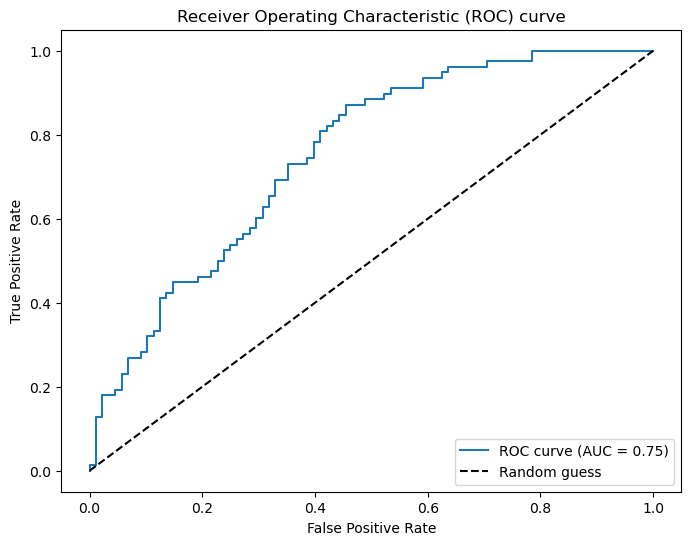

In [57]:
print('Confusion matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC score:', auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

Testing Against the Train Data:

In [58]:
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.7319277108433735

**Model 2: DecisionTreeClassifier**

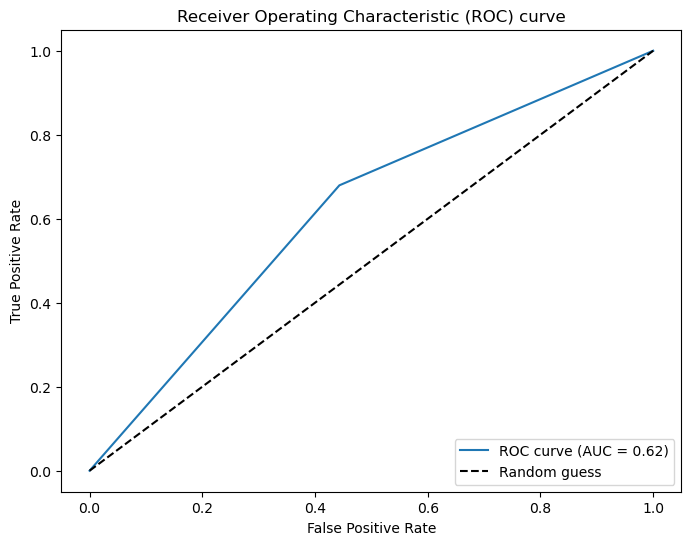

Confusion matrix:
 [[49 39]
 [25 53]]
Accuracy: 0.6144578313253012
Precision: 0.5760869565217391
Recall: 0.6794871794871795
F1 score: 0.623529411764706
AUC score: 0.6181526806526807


In [59]:
X = features.loc[combined.index, ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Education_Graduation', 'Education_PhD', 'Education_Master',
       'Education_Basic', 'Education_2n Cycle', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Married',
       'Marital_Status_Divorced', 'Marital_Status_Widow',
       'Marital_Status_Alone', 'Marital_Status_Absurd', 'Marital_Status_YOLO']]
y = combined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict the target variable for the testing data and evaluate the performance
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

# Print the performance metrics
print('Confusion matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC score:', auc)

**Model 3: LinearSVC**

In [60]:
X = features.loc[combined.index, ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Education_Graduation', 'Education_PhD', 'Education_Master',
       'Education_Basic', 'Education_2n Cycle', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Married',
       'Marital_Status_Divorced', 'Marital_Status_Widow',
       'Marital_Status_Alone', 'Marital_Status_Absurd', 'Marital_Status_YOLO']]
y = combined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the linear SVC classifier and fit it to the training data
clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

# Predict the target variable for the testing data and evaluate the performance
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_pred_score = clf.decision_function(X_test)
auc = roc_auc_score(y_test, y_pred_score)

**Evaluation**

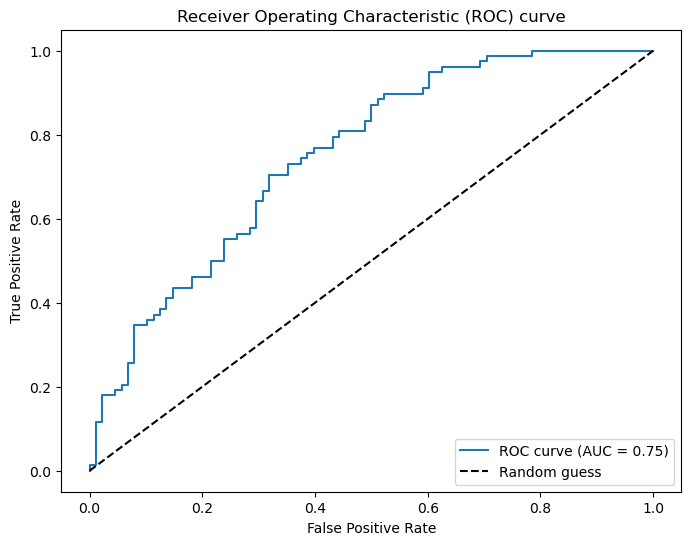

Confusion matrix:
 [[58 30]
 [23 55]]
Accuracy: 0.6807228915662651
Precision: 0.6470588235294118
Recall: 0.7051282051282052
F1 score: 0.6748466257668712
AUC score: 0.7501456876456877


In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

print('Confusion matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC score:', auc)

**Question 4b** <br>
I choose Model 3, the LineaarRVC model mainly because comparitively, it has the highest levels of Accuracy, Precision, F1 Score as well as the AUC Score.  

## Question 5
***

**Question a**

In [62]:
X = features.loc[combined.index, ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Education_Graduation', 'Education_PhD', 'Education_Master',
       'Education_Basic', 'Education_2n Cycle', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Married',
       'Marital_Status_Divorced', 'Marital_Status_Widow',
       'Marital_Status_Alone', 'Marital_Status_Absurd', 'Marital_Status_YOLO']]
y = combined

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to test
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'loss': ['hinge', 'squared_hinge'],
              'dual': [True, False],
              'tol': [1e-4, 1e-3, 1e-2]}

# Perform grid search over the hyperparameters
clf = LinearSVC(max_iter=10000)
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best hyperparameters:", best_params)
print("Best accuracy score:", best_score)

# Train a final model using the best hyperparameters on the entire training set
clf = LinearSVC(**best_params, max_iter=10000)
clf.fit(X_train, y_train)

# Test the final model on the test set and print the accuracy score
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score on test set:", acc)

/Users/kithaa1/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kithaa1/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kithaa1/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kithaa1/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kithaa1/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kithaa1/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: Conv

Best hyperparameters: {'C': 1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1', 'tol': 0.0001}
Best accuracy score: 0.7003417634996583
Accuracy score on test set: 0.6987951807228916


/Users/kithaa1/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kithaa1/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kithaa1/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kithaa1/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
---------------------------------------------------------------------------

**Question b**

In [63]:
X = features.loc[combined.index, ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Education_Graduation', 'Education_PhD', 'Education_Master',
       'Education_Basic', 'Education_2n Cycle', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Married',
       'Marital_Status_Divorced', 'Marital_Status_Widow',
       'Marital_Status_Alone', 'Marital_Status_Absurd', 'Marital_Status_YOLO']]
y = combined

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to test
C_values = [0.1, 1, 10]
penalties = ['l1', 'l2']

# Perform K-fold cross-validation for each combination of hyperparameters
best_score = 0
for C in C_values:
    for penalty in penalties:
        clf = LinearSVC(C=C, penalty=penalty, dual=False, max_iter=10000) # adjust the parameters of the classifier to suit your own data
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        avg_score = sum(scores)/len(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_params = {'C': C, 'penalty': penalty}

# Train a final model using the best hyperparameters on the entire training set
clf = LinearSVC(C=best_params['C'], penalty=best_params['penalty'], dual=False, max_iter=10000) # adjust the parameters of the classifier to suit your own data
clf.fit(X_train, y_train)

# Test the final model on the test set and print the accuracy score
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score on test set:", acc)

Accuracy score on test set: 0.6987951807228916


**Question c**

In [73]:
X = features.loc[combined.index, ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Education_Graduation', 'Education_PhD', 'Education_Master',
       'Education_Basic', 'Education_2n Cycle', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Married',
       'Marital_Status_Divorced', 'Marital_Status_Widow',
       'Marital_Status_Alone', 'Marital_Status_Absurd', 'Marital_Status_YOLO']]
y = combined

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a base model on the entire training set
base_model = LinearSVC(random_state=42, max_iter=1000)
base_model.fit(X_train, y_train)

# Train an AdaBoost classifier on the entire training set, using the base model as the weak learner
ada_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=100, learning_rate=1.0, algorithm='SAMME', random_state=42)
ada_model.fit(X_train, y_train)

# Test the AdaBoost classifier on the test set and print the accuracy score
y_pred = ada_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score on test set:", acc)

Accuracy score on test set: 0.6746987951807228


/Users/kithaa1/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Question 6**

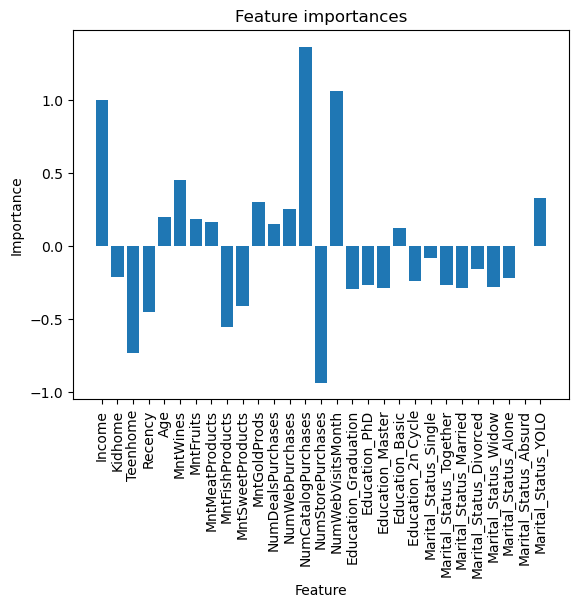

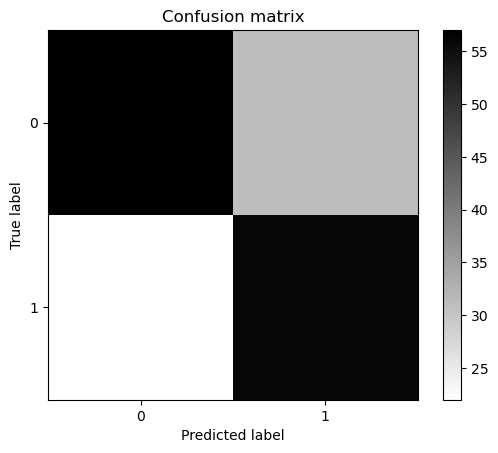

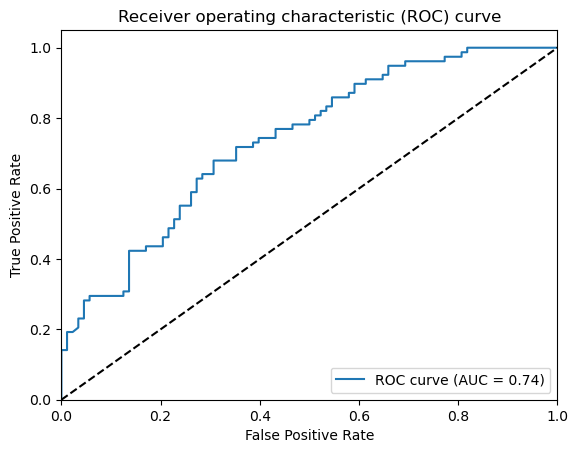

In [68]:
X = features.loc[combined.index, ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Education_Graduation', 'Education_PhD', 'Education_Master',
       'Education_Basic', 'Education_2n Cycle', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Married',
       'Marital_Status_Divorced', 'Marital_Status_Widow',
       'Marital_Status_Alone', 'Marital_Status_Absurd', 'Marital_Status_YOLO']]
y = combined

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear support vector classifier on the entire training set
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

# Plot the feature importances
plt.bar(range(X.shape[1]), svm_model.coef_[0])
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.title("Feature importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Plot 2: Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='binary')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")
plt.colorbar()
plt.show()

# Plot 3: ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = ada_model.predict_proba(X_test)[:, 1] # probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

**Limitations:**
* One key limitation with the model is the data that is fed in. i.e. The data collected is heavily skewed, meaning that even after perfomring transformations, the complete set could not be used to determine the likelihood of an individual to purchase goods from the marketing campaign
* The model considers many of the features and which provides it some overfitting components. 

**Implications**
* Using this model can allow the marketing company to now know the likelihood of a purchase from any given customer type

**Future Work**
* Feature Engineering: only the log transformation and square root transfomration was used, which were both not the best suited for the data provided. Therefore, it would be interesting to see how the data could be manipulated to better analysis
* Ensemble methods: It would be work trying to use other methods such as bagging, boosting, or stacking to improve the performance of the model